In [11]:
%%capture
import os

if os.getenv("COLAB_RELEASE_TAG"):
    !git clone https://github.com/ivanbrillo/tesiRFX
    %cd tesiRFX
    !rsync -a --exclude='*.ipynb' --exclude='*.git' ./ ../
    %cd ..
    !rm -rf tesiRFX
    
import tensorflow as tf
from tensorflow.keras import layers
import customLib.autoencoder_helper as helper
from customLib.betaVAE import VAE, get_seq_fullAE
from customLib.AE import AE, get_sequentials_outer

In [12]:
from customLib.data_parser import load_database, load_db_shuffled

train, test = load_db_shuffled(90)

print(train.shape)
# train, test = helper.get_splitted_np(win_size=80, alpha=40)

(191, 1800, 1)


In [13]:
autoencoder = AE(*get_sequentials_outer())
autoencoder.set_trainable(False)
autoencoder.build(input_shape=(None, 1800, 1))
autoencoder.load_weights("./weights/convAE.h5")

In [14]:
fullVAE = VAE(*get_seq_fullAE(autoencoder), latent_dim=2)

In [15]:
fullVAE.build(input_shape=(None, 1800, 1))
# fullVAE.load_weights("./weights/vae2.h5")
# fullVAE.kl_weight.assign(0.5)

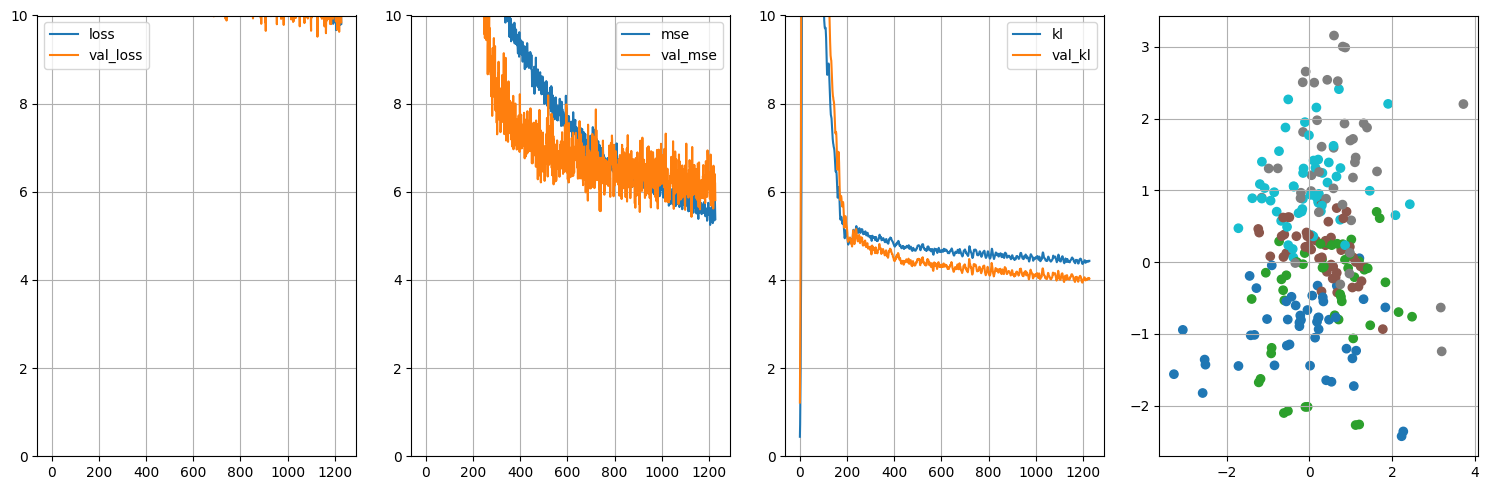

1/1 [==============================] - 2s 2s/step - loss: 9.8152 - mse: 5.3810 - kl: 4.4342 - val_loss: 9.8438 - val_mse: 5.8121 - val_kl: 4.0317
Epoch 1228/3000
8/8 [==============================] - 0s 9ms/step


In [ ]:
helper.train_and_evaluate(fullVAE, train, test, epochs_n=3000, apply_filter=True, show_latent=True, patience=500, batch_size=400, monitor="val_mse")